In [ ]:
#recommended from StLearn github to lower the numba version :  
#If I do get thprblems re-lower the nunpy version to latestet version 1.21.X, then downgrade numba to version 0.57.1

In [13]:
#pip install -U stlearn

In [71]:
import pandas as pd
import numpy as np

import stlearn as st
import scanpy as sc

import warnings
warnings.filterwarnings("ignore")

### Create the object for stLearn

In [72]:
import stlearn as st
adata = st.create_stlearn(count=count_matrix,spatial=spatial,library_id="Sample_test", scale=1,background_color="white")

In [103]:
chuvio_L1_1_TULB = sc.read_h5ad('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L1_1.h5ad')

In [117]:
spatial = chuvio_L1_1_TULB.obs[['x_centroid', 'y_centroid']].copy()
spatial.rename(columns={'x_centroid': 'imagecol'}, inplace=True)
spatial.rename(columns={'y_centroid': 'imagerow'}, inplace=True)

In [118]:
count_matrix = chuvio_L1_1_TULB.layers['logcounts']

In [119]:
count_matrix

<71187x313 sparse matrix of type '<class 'numpy.float64'>'
	with 3873591 stored elements in Compressed Sparse Column format>

In [120]:
adata_L1_1_TULB = st.create_stlearn(count=count_matrix,spatial=spatial,library_id="Sample_test", scale=1,background_color="white")

In [123]:
chuvio_L1_1_TULB.obs['singler_annotation']

L1_1_aaaadbga-1             Fibroblasts
L1_1_aaaajnma-1             Fibroblasts
L1_1_aaadecno-1               Pericytes
L1_1_aaafkiae-1             Fibroblasts
L1_1_aaahijio-1               Pericytes
                           ...         
L1_1_oielkile-1             Fibroblasts
L1_1_oieofjmb-1             Fibroblasts
L1_1_oieokhmm-1    Endothelia_lymphatic
L1_1_oifafdfc-1             Tu_L1_SFTPB
L1_1_oifameeo-1             Tu_L1_SFTPB
Name: singler_annotation, Length: 71187, dtype: category
Categories (24, object): ['B cells', 'DC_1', 'DC_2', 'DC_activated', ..., 'T_CD4', 'T_CTL', 'T_regs', 'Tu_L1_SFTPB']

In [ ]:
#problem with getting the sam

In [121]:
#add the cell annotations
adata_L1_1_TULB.obs['cell_type'] = chuvio_L1_1_TULB.obs['singler_annotation']

In [122]:
adata_L1_1_TULB.obs['cell_type']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
71182    NaN
71183    NaN
71184    NaN
71185    NaN
71186    NaN
Name: cell_type, Length: 71187, dtype: category
Categories (24, object): ['B cells', 'DC_1', 'DC_2', 'DC_activated', ..., 'T_CD4', 'T_CTL', 'T_regs', 'Tu_L1_SFTPB']

### For plotting the number of reads and the number of genes simulataniously.

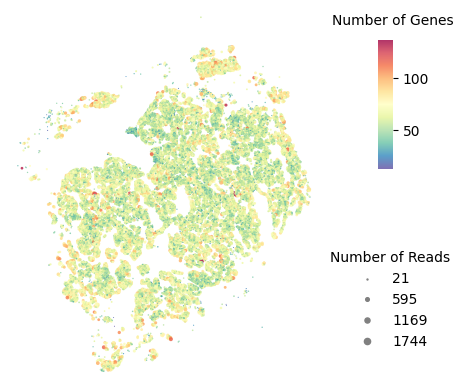

In [60]:
st.pl.QC_plot(adata_L1_1_TULB, spot_size = (0.5,20))

ValueError:  is not exist in the data, please try another gene

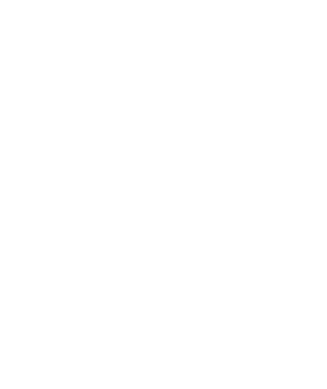

In [46]:
st.pl.gene_plot(adata_L1_1_TULB,cell_alpha = 0.2, gene_symbols="")

# test - following "StLearn Cell-Cell Interaction Analysis

In [86]:
data = adata_L1_1_TULB

data.obs['cell_type'] = data.obs['cell_type']

In [100]:
data.var_names_make_unique()
#We don't add the image here as in the vignette
#st.add.image(adata=data,
             #imgpath=data_dir+"spatial/tissue_hires_nobg.png",
             #library_id="V1_Breast_Cancer_Block_A_Section_1", visium=True)

# Basic normalisation #
#st.pp.filter_genes(data, min_cells=3)
#st.pp.normalize_total(data) # NOTE: no log1p

In [101]:
labels = data.obs['cell_type']

In [102]:
print(labels)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
30203    NaN
30204    NaN
30205    NaN
30206    NaN
30207    NaN
Name: cell_type, Length: 30208, dtype: category
Categories (2, object): ['B cells', 'Tu_L1_SFTPB']
